<img src=images/logo.png align='right' width=200>

# Rolling Averages

## Goal
In this notebook we shall examine how Pandas can be used to compute rolling averages. This process can help to make trends clearer to visualise.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Again, we will use the *household power consumption* dataset. It comes from [UCI ML repo](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption) and contains detailed power consumption time series data of a single household in Paris between 2006 and 2010.
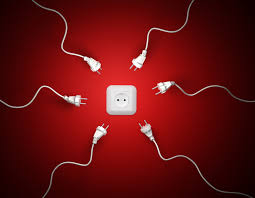

In [2]:
power = pd.read_csv('data/household_power_consumption.csv', parse_dates=['ts'], index_col='ts')
power_daily = power.resample('D').sum()
power_daily.head()

,consumption
ts,
2006-12-16,14680.933333
2006-12-17,36946.666667
2006-12-18,19028.433333
2006-12-19,13131.900000
2006-12-20,20384.800000


<a id='s'></a>
## Shifting

It can be often useful to shift some variables forward or backwards in time. This can for example help us create variables with lagged values or calculate differences in values between time steps. This can be done using Panda's `shift()` method, which can shift values by a given number of periods (positive or negative). The example below uses this method to create a new variable for electricity consumption during the previous day:

In [5]:
power_daily[['consumption']]

,consumption
ts,
2006-12-16,14680.933333
2006-12-17,36946.666667
2006-12-18,19028.433333
2006-12-19,13131.900000
2006-12-20,20384.800000
...,...
2010-11-22,16924.600000
2010-11-23,16352.266667
2010-11-24,13769.466667


In [15]:
power_daily

,consumption
ts,
2006-12-16,14680.933333
2006-12-17,36946.666667
2006-12-18,19028.433333
2006-12-19,13131.900000
2006-12-20,20384.800000
...,...
2010-11-22,16924.600000
2010-11-23,16352.266667
2010-11-24,13769.466667


In [14]:
(
    power_daily
    .assign(consumption_yesterday = power_daily['consumption'].shift(1))
    .assign(consumption_change = lambda df: df['consumption'] - df['consumption_yesterday'])
    .dropna()
    .head()
)

,consumption,consumption_yesterday,consumption_change
ts,,,
2006-12-17,36946.666667,14680.933333,22265.733333
2006-12-18,19028.433333,36946.666667,-17918.233333
2006-12-19,13131.900000,19028.433333,-5896.533333
2006-12-20,20384.800000,13131.900000,7252.900000
2006-12-21,13801.400000,20384.800000,-6583.400000


Alternatively we can use the `diff()` method to do this.

In [13]:
(
    power_daily
    .assign(consumption_change = power_daily['consumption'].diff(1))
    .dropna()
    .head()
)

,consumption,consumption_change
ts,,
2006-12-17,36946.666667,22265.733333
2006-12-18,19028.433333,-17918.233333
2006-12-19,13131.900000,-5896.533333
2006-12-20,20384.800000,7252.900000
2006-12-21,13801.400000,-6583.400000


<a id='rs'></a>
## Rolling average

Let us have a closer look at the power consumption patterns during a single year. The simplest way to plot timestamp data dynamics in Pandas is using `plot()`, which by default plots a linear plot over time:

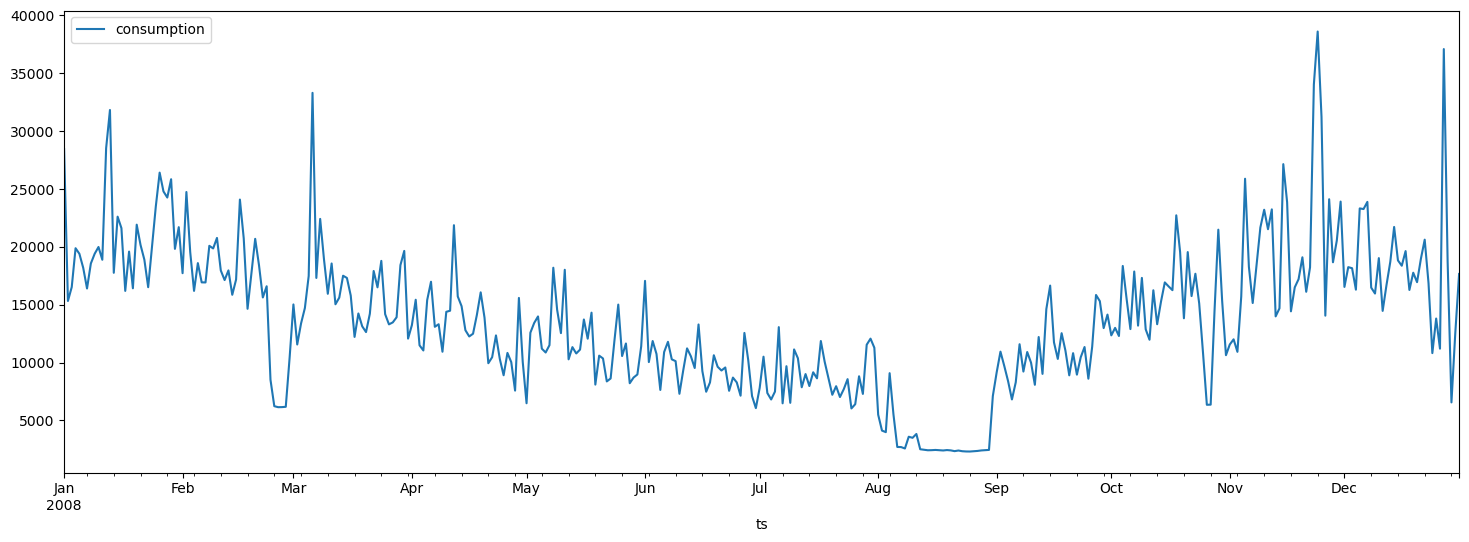

In [16]:
power_daily2008 = power_daily.loc['2008']

power_daily2008.plot(figsize=(18,6));

Various patterns can be seen on this daily line graph, but overal patterns may be hard to seen due to noise plentiful short spikes. 

In order to see a *smoother* patterns over time, a __rolling average__ can be applied to a time series. A rolling average walks over a given window (7 days for example) and calculates the average for each window.

If our window would look backwards in time, the rolling average for our daily power consumption dataset in 2008 would be as follows:

| Window            | Average |
|-------------------|---------|
| ...               | ...     |
| 1st Jan 2008 - 7th Jan 2008| 19163   |
| 2nd Jan 2008- 8th Jan 2008| 17752   |
| 3rd Jan 2008 - 9th Jan 2008| 18334.   |
| ....              | ...     |

In [21]:
(
    power_daily2008
    .loc['2nd Jan 2008':'8th Jan 2008']
    .mean()
)

consumption    17751.528571
dtype: float64

In [22]:
pd.__version__

'1.5.1'

Pandas can perform rolling calculations via the `.rolling()` method which can be called on both a dataframe as well as a series object. 

In [19]:
(
    power_daily2008
    .assign(rolling_mean=lambda df: df['consumption'].rolling('7D').mean())
).head(10)

,consumption,rolling_mean
ts,,
2008-01-01,28440.633333,28440.633333
2008-01-02,15320.766667,21880.700000
2008-01-03,16521.466667,20094.288889
2008-01-04,19878.533333,20040.350000
2008-01-05,19397.466667,19911.773333
2008-01-06,18184.733333,19623.933333
2008-01-07,16399.566667,19163.309524
2008-01-08,18558.166667,17751.528571
2008-01-09,19398.333333,18334.038095


The window size for this method can be set using both a fixed number of data points as well as particular time intervals (days, weeks etc).

In [ ]:
(
    power_daily2008
    .assign(rolling_mean=lambda df: df['consumption'].rolling(7).mean())
).head(10)

Plotting the rolling average of time series data can remove the noise spikes and allow us to see the patterns in the data.

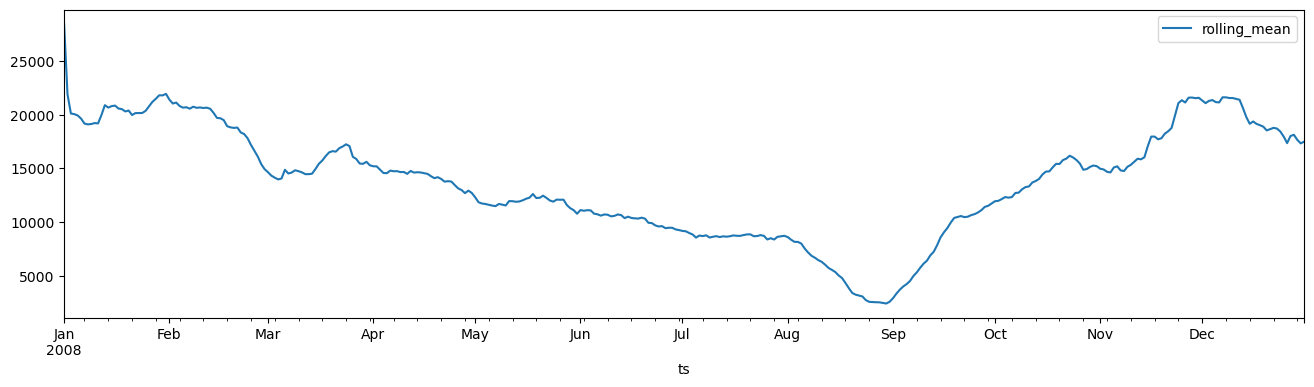

In [23]:
(
    power_daily2008
    .assign(rolling_mean=lambda df: df['consumption'].rolling('20D').mean())
      .drop(columns=['consumption'])
    .plot(figsize=(16, 4))
);

Notice how the smoothness is affected by the window size.

In [ ]:
(
    power_daily2008
    .assign(rolling_mean=lambda df: df['consumption'].rolling('20D').mean())
    .assign(rolling_mean_small=lambda df: df['consumption'].rolling('7D').mean())
    .assign(rolling_mean_large=lambda df: df['consumption'].rolling('60D').mean())
    #.drop(columns=['consumption'])
    .plot(figsize=(16, 4))
);

Note that the smoothed lines above are lagging behind what actually happens.

This is because by default, pandas computes the rolling average using information from the previous datapoints.

We can remove this effect using **centering**.

To center the rolling mean, we can use the option `center=True`.

In [ ]:
(
    power_daily2008
    .assign(rolling_mean=lambda df: df['consumption'].rolling('5D').mean())
    .assign(rolling_mean_center=lambda df: df['consumption'].rolling('5D', center=True).mean())
).head()

In [ ]:
(
    power_daily2008
    .assign(rolling_mean=lambda df: df['consumption'].rolling('21D').mean())
    .assign(rolling_mean_center=lambda df: df['consumption'].rolling('21D', center=True).mean())
    #.drop(columns=['consumption'])  
    .plot(figsize=(16,4), title='rolling_mean_center and manual_center overlap' )
);

Alternatively, we could manually shift the data backwards. 

You can see below how both achieve the same result - the lines are overlapping! 

In [ ]:
(
    power_daily2008
    .assign(rolling_mean=lambda df: df['consumption'].rolling('21D').mean())
    .assign(rolling_mean_center=lambda df: df['consumption'].rolling('21D', center=True).mean())
    .assign(manual_center=lambda df: df['rolling_mean'].shift(-10))
    .drop(columns=['consumption', 'rolling_mean']) 
    .plot(figsize=(16,4), title='rolling_mean_center and manual_center overlap')
);

**Important**: Note that centering requires information from the future for each point, which means it would be unfair to use it for predictions.

You can also do more than just 'calculating the mean' — you can also compute other statistics (such as variance).

In [ ]:
(
    power_daily2008
    .assign(
        rolling_var=lambda df: df['consumption'].rolling('20D').var(),
        #rolling_var_center=lambda df: df['consumption'].rolling(20, center=True).var()
    )
    .drop(columns='consumption')
    .plot(figsize=(16,4))
);

## <mark>Exercise: Rolling averages

Compute the rolling 5-day average for the original power dataset.

Can you find the 5-day period of time that has the highest average power consumption?

#### Rolling Average Summary

A simple way to isolate signal from noise in time series data and get an idea about general time series behavior.

It however has some important drawbacks:

- small window sizes can lead to more noise than signal
- it always lags by the window size (unless centered)
- it is not really informative about the future
- can be significantly skewed by extreme datapoints in the past